# 📄 Generate illustrative plots showing iterative manifold topology changes in the manifold-informed backward elimination algorithm (**Figure 2**)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
scaling = 'level'
n_components = 2
sample_percentage = 100

In [3]:
data_tag = 'lightweight-flamelet-CO-H2-10-1'
%run -i load-SLFM-data.py

Removing N2.

The data set has 9800 observations.

Using: T, H2, O2, OH, H2O, CO, CO2 as target variables.


***

## Run the manifold-informed backward elimination algorithm

In [ ]:
ordered_variables, selected_variables, optimized_cost, costs = analysis.manifold_informed_backward_elimination(state_space,
                                                                                            state_space_sources,
                                                                                            list(state_space_names),
                                                                                            scaling=scaling,
                                                                                            bandwidth_values=bandwidth_values,
                                                                                            target_variables=target_variables,
                                                                                            add_transformed_source=True,
                                                                                            source_space='original-and-continuous-symlog',
                                                                                            target_manifold_dimensionality=n_components,
                                                                                            penalty_function=penalty_function,
                                                                                            norm=norm,
                                                                                            integrate_to_peak=False,
                                                                                            verbose=True)

print(state_space_names[selected_variables])

Optimizing...

PC source terms will be assessed in the original-and-continuous-symlog space.

Iteration No.1
Currently eliminating variable from the following list: 
['T', 'H2', 'O2', 'O', 'OH', 'H2O', 'H', 'HO2', 'CO', 'CO2', 'HCO']
	Currently eliminated variable: T
	Running PCA for a subset:
	H2, O2, O, OH, H2O, H, HO2, CO, CO2, HCO
	Cost:	25.2808
	Currently eliminated variable: H2
	Running PCA for a subset:
	T, O2, O, OH, H2O, H, HO2, CO, CO2, HCO
	Cost:	28.7130
	Currently eliminated variable: O2
	Running PCA for a subset:
	T, H2, O, OH, H2O, H, HO2, CO, CO2, HCO
	Cost:	29.1466
	Currently eliminated variable: O
	Running PCA for a subset:
	T, H2, O2, OH, H2O, H, HO2, CO, CO2, HCO
	Cost:	30.9018
	Currently eliminated variable: OH
	Running PCA for a subset:
	T, H2, O2, O, H2O, H, HO2, CO, CO2, HCO
	Cost:	29.6438
	Currently eliminated variable: H2O
	Running PCA for a subset:
	T, H2, O2, O, OH, H, HO2, CO, CO2, HCO


In [4]:
pca = reduction.PCA(state_space, scaling=scaling, n_components=n_components)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)
symlog_PC_sources = preprocess.log_transform(PC_sources, method='continuous-symlog', threshold=1.e-4)

In [5]:
tic = time.perf_counter()

depvars = np.hstack((PC_sources, symlog_PC_sources, target_variables))
depvar_names = ['SZ' + str(i+1) for i in range(0,n_components)] + ['contsymlog-SZ' + str(i) for i in range(1,n_components+1)] + target_variables_names

variance_data = analysis.compute_normalized_variance(PCs,
                                                     depvars,
                                                     depvar_names=depvar_names,
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function=penalty_function, 
                                                             norm=norm,
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.7 minutes.
----------------------------------------


In [6]:
print(cost)

25.8672563654024


***

## ✏️ Plot

In [7]:
subset_indices = [2, 1, 6, 4, 8, 9, 0, 5, 3, 10, 7]
ordered_variables = [2, 1, 6, 4, 8, 9, 0, 5, 3, 10, 7]

Initial state vector:
[2, 1, 6, 4, 8, 9, 0, 5, 3, 10, 7]
['O2' 'H2' 'H' 'OH' 'CO' 'CO2' 'T' 'H2O' 'O' 'HCO' 'HO2']

Iteration 2
Remove HO2
[2, 1, 6, 4, 8, 9, 0, 5, 3, 10]
['O2' 'H2' 'H' 'OH' 'CO' 'CO2' 'T' 'H2O' 'O' 'HCO']

Iteration 3
Remove HCO
[2, 1, 6, 4, 8, 9, 0, 5, 3]
['O2' 'H2' 'H' 'OH' 'CO' 'CO2' 'T' 'H2O' 'O']

Iteration 4
Remove O
[2, 1, 6, 4, 8, 9, 0, 5]
['O2' 'H2' 'H' 'OH' 'CO' 'CO2' 'T' 'H2O']

Iteration 5
Remove H2O
[2, 1, 6, 4, 8, 9, 0]
['O2' 'H2' 'H' 'OH' 'CO' 'CO2' 'T']


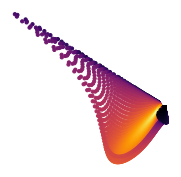

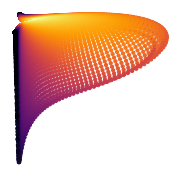

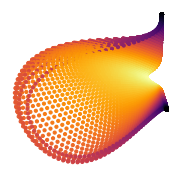

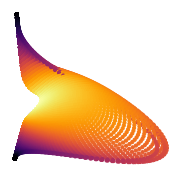

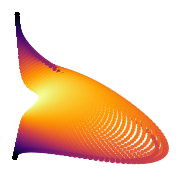

In [8]:
for index, i in enumerate([11, 10, 9, 8, 7]):
    if index > 0:
        print('\nIteration ' + str(index+1) + '\nRemove ' + state_space_names[ordered_variables][-index])
    else:
        print('Initial state vector:')

    subset_indices = ordered_variables[0:i]
    print(subset_indices)
    print(state_space_names[subset_indices])
    
    subset_pca = reduction.SubsetPCA(state_space, X_source=state_space_sources, full_sequence=False, subset_indices=subset_indices, scaling=scaling, n_components=2)
    PCs = subset_pca.principal_components

    figure = plt.figure(figsize=(3, 3))
    scat_b = plt.scatter(PCs[:,0], PCs[:,1], c=state_space[:,0], s=10, cmap='inferno', vmin=np.min(state_space[:,0]), vmax=np.max(state_space[:,0]))
    plt.xticks([])
    plt.yticks([])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.savefig('../figures/Figure-2-' + str(index) + '.png', dpi=300, bbox_inches='tight')

***